#MNIST

## Data

In [76]:
import torch
import torch.nn as nn
import torchvision as tv

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm
from pprint import pprint

In [77]:
torch.cuda.is_available()

True

In [78]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [79]:
ds_mnist = tv.datasets.MNIST('./datasets', download=True, transform=trans)

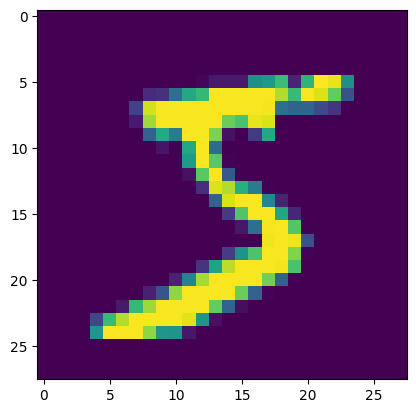

In [80]:
plt.imshow(ds_mnist[0][0].numpy()[0])

In [81]:
train_size = int(0.8 * len(ds_mnist))
test_size = len(ds_mnist) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(ds_mnist, [train_size, test_size])

In [82]:
print(len(train_dataset))
print(len(test_dataset))

48000
12000


In [83]:
batch_size = 16
dataloader_train = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True,
    num_workers=1, drop_last=True
)
dataloader_test = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True,
    num_workers=1, drop_last=True
)

In [84]:
for img, label in dataloader_train:
  print(img.shape)
  print(label.shape)
  break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [85]:
print(len(dataloader_train))
print(len(dataloader_test))

3000
750


## Model 1 (1 linear)

In [86]:
class Model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 10)

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear1(out)

    return out

## Model 2 (2 linear)

In [87]:
class Model2(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 10)
    self.relu1 = nn.ReLU()

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear1(out)
    out = self.relu1(out)
    out = self.linear2(out)

    return out

## Model 3 (3 linear)

In [88]:
class Model3(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.linear3 = nn.Linear(50, 10)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()
  def forward(self, x):
    out = self.flatten(x)
    out = self.linear1(out)
    out = self.relu1(out)
    out = self.linear2(out)
    out = self.relu2(out)
    out = self.linear3(out)

    return out

## Model 4 (4 linear)

In [89]:
class Model4(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 80)
    self.linear3 = nn.Linear(80, 40)
    self.linear4 = nn.Linear(40, 10)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()
    self.relu3 = nn.ReLU()

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear1(out)
    out = self.relu1(out)
    out = self.linear2(out)
    out = self.relu2(out)
    out = self.linear3(out)
    out = self.relu3(out)
    out = self.linear4(out)

    return out

## Model 5 (5 linear)

In [90]:
class Model5(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 200)
    self.linear2 = nn.Linear(200, 100)
    self.linear3 = nn.Linear(100, 50)
    self.linear4 = nn.Linear(50, 20)
    self.linear5 = nn.Linear(20, 10)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()
    self.relu3 = nn.ReLU()
    self.relu4 = nn.ReLU()

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear1(out)
    out = self.relu1(out)
    out = self.linear2(out)
    out = self.relu2(out)
    out = self.linear3(out)
    out = self.relu3(out)
    out = self.linear4(out)
    out = self.relu4(out)
    out = self.linear5(out)

    return out

## Params cnt

In [91]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [92]:
model1 = Model1()
model2 = Model2()
model3 = Model3()
model4 = Model4()
model5 = Model5()

In [93]:
print('Model1 : ' + str(count_parameters(model1)))
print('Model2 : ' + str(count_parameters(model2)))
print('Model3 : ' + str(count_parameters(model3)))
print('Model4 : ' + str(count_parameters(model4)))
print('Model5 : ' + str(count_parameters(model5)))

Model1 : 7850
Model2 : 79510
Model3 : 84060
Model4 : 90230
Model5 : 183380


## Accuracy funcion

In [94]:
def accuracy(fcast, label):
  answer = nn.functional.softmax(
      fcast.detach()
  ).numpy().argmax(1) == label.numpy().argmax(1)
  return answer.mean()

## Model1 fitting

In [95]:
model1 = Model1()
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model1.parameters(), lr=1e-3)

In [96]:
device = 'cpu'
model = model1.to(device)
loss = loss.to(device)

In [97]:
loss_train_model1 = [0]
loss_test_model1 = [0]
acc_train_model1 = [0]
acc_test_model1 = [0]

In [98]:
epochs = 10

for epoch in range(epochs):
  print('Epoch ' + str(epoch+1))
  print()
  loss_train = 0
  acc_train = 0
  loss_test = 0
  acc_test = 0
  for img, label in dataloader_train:
    opt.zero_grad()
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_am = loss(fcast, label)
    loss_am.backward()
    loss_train += loss_am.item()

    opt.step()
    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_train += acc_current

    #pbar.set_description(f'loss: {loss_am.item():.5f}\taccuracy: {acc_current:.3f}')
  print('loss_train:' + str(loss_train/len(dataloader_train)))
  print('acc_train:' + str(acc_train/len(dataloader_train)))
  acc_train_model1.append(acc_train/len(dataloader_train))
  loss_train_model1.append(loss_train/len(dataloader_train))

  for img, label in dataloader_test:
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_test += loss_am.item()

    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_test += acc_current

  print('loss_test:' + str(loss_test/len(dataloader_test)))
  print('acc_test:' + str(acc_test/len(dataloader_test)))
  acc_test_model1.append(acc_test/len(dataloader_test))
  loss_test_model1.append(loss_test/len(dataloader_test))
  print('------------------------------------------------------------')

Epoch 1



<ipython-input-94-02407182cc67>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = nn.functional.softmax(


loss_train:0.4386496172895034
acc_train:0.8864583333333333
loss_test:0.14709782600402832
acc_test:0.9144166666666667
------------------------------------------------------------
Epoch 2

loss_train:0.29967477077928684
acc_train:0.9168541666666666
loss_test:0.3936370015144348
acc_test:0.9176666666666666
------------------------------------------------------------
Epoch 3

loss_train:0.2808797582971553
acc_train:0.9217916666666667
loss_test:0.23094354569911957
acc_test:0.9216666666666666
------------------------------------------------------------
Epoch 4

loss_train:0.2714658344911101
acc_train:0.9237708333333333
loss_test:0.09435620158910751
acc_test:0.9229166666666667
------------------------------------------------------------
Epoch 5

loss_train:0.26532272301521154
acc_train:0.9266458333333333
loss_test:0.4187855124473572
acc_test:0.9231666666666667
------------------------------------------------------------
Epoch 6

loss_train:0.26012753654830156
acc_train:0.9271875
loss_test:0.42

## Model1 plots

In [99]:
loss_train_model1 = np.array(loss_train_model1)
loss_test_model1 = np.array(loss_test_model1)
acc_train_model1 = np.array(acc_train_model1)
acc_test_model1 = np.array(acc_test_model1)
epochs = np.arange(len(loss_train_model1))

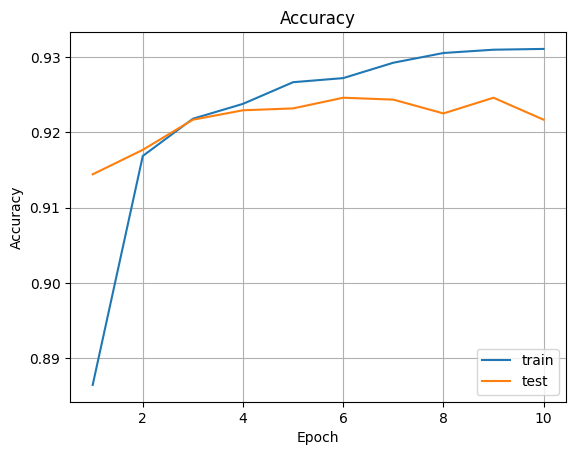

In [100]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(epochs[1:], acc_train_model1[1:])
plt.plot(epochs[1:], acc_test_model1[1:])
plt.legend(['train', 'test'], loc=4)
plt.show()

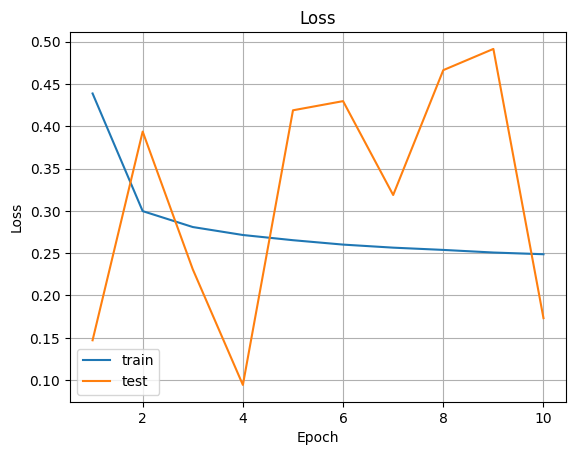

In [101]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(epochs[1:], loss_train_model1[1:])
plt.plot(epochs[1:], loss_test_model1[1:])
plt.legend(['train', 'test'], loc=3)
plt.show()

## Model2 fitting

In [102]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model2.parameters(), lr=1e-3)

In [103]:
device = 'cpu'
model = model2.to(device)
loss = loss.to(device)

In [104]:
loss_train_model2 = [0]
loss_test_model2 = [0]
acc_train_model2 = [0]
acc_test_model2 = [0]

In [105]:
epochs = 10

for epoch in range(epochs):
  print('Epoch ' + str(epoch+1))
  print()
  loss_train = 0
  acc_train = 0
  loss_test = 0
  acc_test = 0
  for img, label in dataloader_train:
    opt.zero_grad()
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_am = loss(fcast, label)
    loss_am.backward()
    loss_train += loss_am.item()

    opt.step()
    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_train += acc_current

    #pbar.set_description(f'loss: {loss_am.item():.5f}\taccuracy: {acc_current:.3f}')
  print('loss_train:' + str(loss_train/len(dataloader_train)))
  print('acc_train:' + str(acc_train/len(dataloader_train)))
  acc_train_model2.append(acc_train/len(dataloader_train))
  loss_train_model2.append(loss_train/len(dataloader_train))

  for img, label in dataloader_test:
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_test += loss_am.item()

    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_test += acc_current

  print('loss_test:' + str(loss_test/len(dataloader_test)))
  print('acc_test:' + str(acc_test/len(dataloader_test)))
  acc_test_model2.append(acc_test/len(dataloader_test))
  loss_test_model2.append(loss_test/len(dataloader_test))
  print('------------------------------------------------------------')

Epoch 1



<ipython-input-94-02407182cc67>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = nn.functional.softmax(


loss_train:0.30359144079623124
acc_train:0.9137916666666667
loss_test:0.1227075383067131
acc_test:0.9518333333333333
------------------------------------------------------------
Epoch 2

loss_train:0.13738111100873598
acc_train:0.9590208333333333
loss_test:0.18518109619617462
acc_test:0.9620833333333333
------------------------------------------------------------
Epoch 3

loss_train:0.0943682690935287
acc_train:0.9722708333333333
loss_test:0.06470095366239548
acc_test:0.9713333333333334
------------------------------------------------------------
Epoch 4

loss_train:0.07162746725540879
acc_train:0.9779583333333334
loss_test:0.006432393565773964
acc_test:0.9713333333333334
------------------------------------------------------------
Epoch 5

loss_train:0.05551691457436148
acc_train:0.9826041666666666
loss_test:0.3639545440673828
acc_test:0.9724166666666667
------------------------------------------------------------
Epoch 6

loss_train:0.04261828925763014
acc_train:0.9864583333333333
lo

## Model2 plots

In [106]:
loss_train_model2 = np.array(loss_train_model2)
loss_test_model2 = np.array(loss_test_model2)
acc_train_model2 = np.array(acc_train_model2)
acc_test_model2 = np.array(acc_test_model2)
epochs = np.arange(len(loss_train_model2))

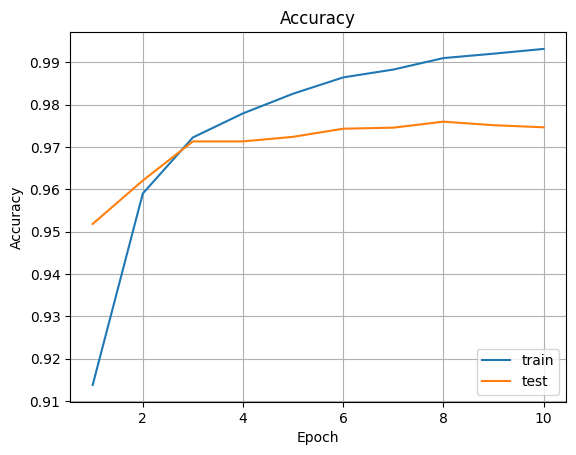

In [107]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(epochs[1:], acc_train_model2[1:])
plt.plot(epochs[1:], acc_test_model2[1:])
plt.legend(['train', 'test'], loc=4)
plt.show()

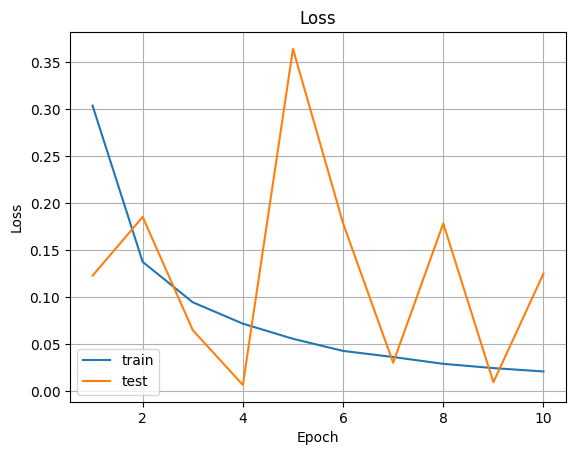

In [108]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(epochs[1:], loss_train_model2[1:])
plt.plot(epochs[1:], loss_test_model2[1:])
plt.legend(['train', 'test'], loc=3)
plt.show()

## Model3 fitting

In [109]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model3.parameters(), lr=1e-3)

In [110]:
device = 'cpu'
model = model3.to(device)
loss = loss.to(device)

In [111]:
loss_train_model3 = [0]
loss_test_model3 = [0]
acc_train_model3 = [0]
acc_test_model3 = [0]

In [112]:
epochs = 10

for epoch in range(epochs):
  print('Epoch ' + str(epoch+1))
  print()
  loss_train = 0
  acc_train = 0
  loss_test = 0
  acc_test = 0
  for img, label in dataloader_train:
    opt.zero_grad()
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_am = loss(fcast, label)
    loss_am.backward()
    loss_train += loss_am.item()

    opt.step()
    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_train += acc_current

    #pbar.set_description(f'loss: {loss_am.item():.5f}\taccuracy: {acc_current:.3f}')
  print('loss_train:' + str(loss_train/len(dataloader_train)))
  print('acc_train:' + str(acc_train/len(dataloader_train)))
  acc_train_model3.append(acc_train/len(dataloader_train))
  loss_train_model3.append(loss_train/len(dataloader_train))

  for img, label in dataloader_test:
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_test += loss_am.item()

    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_test += acc_current

  print('loss_test:' + str(loss_test/len(dataloader_test)))
  print('acc_test:' + str(acc_test/len(dataloader_test)))
  acc_test_model3.append(acc_test/len(dataloader_test))
  loss_test_model3.append(loss_test/len(dataloader_test))
  print('------------------------------------------------------------')

Epoch 1



<ipython-input-94-02407182cc67>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = nn.functional.softmax(


loss_train:0.29972171887708826
acc_train:0.9117291666666667
loss_test:0.24877043068408966
acc_test:0.9531666666666667
------------------------------------------------------------
Epoch 2

loss_train:0.128802450855379
acc_train:0.9615625
loss_test:0.07015849649906158
acc_test:0.96625
------------------------------------------------------------
Epoch 3

loss_train:0.0897970050580916
acc_train:0.9721666666666666
loss_test:0.006596594583243132
acc_test:0.9670833333333333
------------------------------------------------------------
Epoch 4

loss_train:0.0692367204032295
acc_train:0.9772083333333333
loss_test:0.0360044427216053
acc_test:0.9749166666666667
------------------------------------------------------------
Epoch 5

loss_train:0.05379807896882267
acc_train:0.983
loss_test:0.005950188729912043
acc_test:0.97175
------------------------------------------------------------
Epoch 6

loss_train:0.0436612488047637
acc_train:0.9856666666666667
loss_test:0.001981005072593689
acc_test:0.972416

## Model3 plots

In [113]:
loss_train_model3 = np.array(loss_train_model3)
loss_test_model3 = np.array(loss_test_model3)
acc_train_model3 = np.array(acc_train_model3)
acc_test_model3 = np.array(acc_test_model3)
epochs = np.arange(len(loss_train_model3))

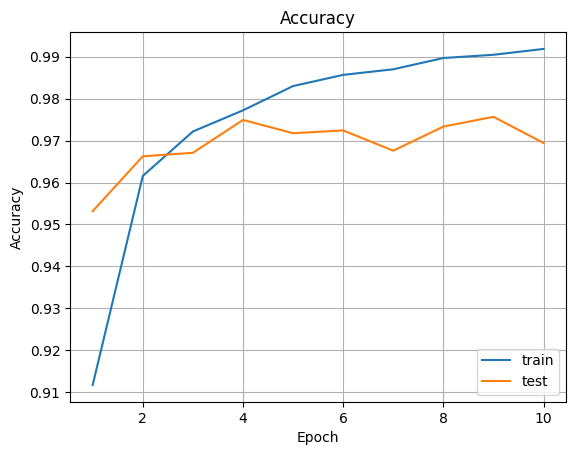

In [114]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(epochs[1:], acc_train_model3[1:])
plt.plot(epochs[1:], acc_test_model3[1:])
plt.legend(['train', 'test'], loc=4)
plt.show()

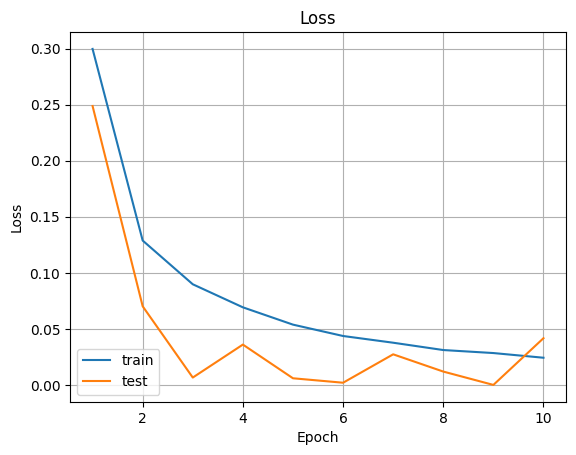

In [115]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(epochs[1:], loss_train_model3[1:])
plt.plot(epochs[1:], loss_test_model3[1:])
plt.legend(['train', 'test'], loc=3)
plt.show()

## Model4 fitting

In [116]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model4.parameters(), lr=1e-3)

In [117]:
device = 'cpu'
model = model4.to(device)
loss = loss.to(device)

In [118]:
loss_train_model4 = [0]
loss_test_model4 = [0]
acc_train_model4 = [0]
acc_test_model4 = [0]

In [119]:
epochs = 10

for epoch in range(epochs):
  print('Epoch ' + str(epoch+1))
  print()
  loss_train = 0
  acc_train = 0
  loss_test = 0
  acc_test = 0
  for img, label in dataloader_train:
    opt.zero_grad()
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_am = loss(fcast, label)
    loss_am.backward()
    loss_train += loss_am.item()

    opt.step()
    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_train += acc_current

    #pbar.set_description(f'loss: {loss_am.item():.5f}\taccuracy: {acc_current:.3f}')
  print('loss_train:' + str(loss_train/len(dataloader_train)))
  print('acc_train:' + str(acc_train/len(dataloader_train)))
  acc_train_model4.append(acc_train/len(dataloader_train))
  loss_train_model4.append(loss_train/len(dataloader_train))

  for img, label in dataloader_test:
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_test += loss_am.item()

    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_test += acc_current

  print('loss_test:' + str(loss_test/len(dataloader_test)))
  print('acc_test:' + str(acc_test/len(dataloader_test)))
  acc_test_model4.append(acc_test/len(dataloader_test))
  loss_test_model4.append(loss_test/len(dataloader_test))
  print('------------------------------------------------------------')

Epoch 1



<ipython-input-94-02407182cc67>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = nn.functional.softmax(


loss_train:0.3085338349028801
acc_train:0.9064375
loss_test:0.03693358600139618
acc_test:0.9509166666666666
------------------------------------------------------------
Epoch 2

loss_train:0.12915566324450387
acc_train:0.9607916666666667
loss_test:0.025080524384975433
acc_test:0.9679166666666666
------------------------------------------------------------
Epoch 3

loss_train:0.09002898470024229
acc_train:0.9722083333333333
loss_test:0.009226387366652489
acc_test:0.96475
------------------------------------------------------------
Epoch 4

loss_train:0.06951209917525072
acc_train:0.9775208333333333
loss_test:0.21648317575454712
acc_test:0.9729166666666667
------------------------------------------------------------
Epoch 5

loss_train:0.05819863961147348
acc_train:0.9819166666666667
loss_test:0.3331502676010132
acc_test:0.97275
------------------------------------------------------------
Epoch 6

loss_train:0.04721989425327805
acc_train:0.9853125
loss_test:0.0023597795516252518
acc_test

## Model4 plots

In [120]:
loss_train_model4 = np.array(loss_train_model4)
loss_test_model4 = np.array(loss_test_model4)
acc_train_model4 = np.array(acc_train_model4)
acc_test_model4 = np.array(acc_test_model4)
epochs = np.arange(len(loss_train_model4))

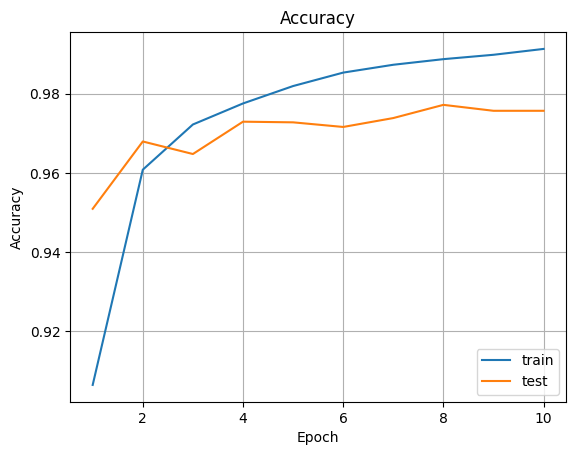

In [121]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(epochs[1:], acc_train_model4[1:])
plt.plot(epochs[1:], acc_test_model4[1:])
plt.legend(['train', 'test'], loc=4)
plt.show()

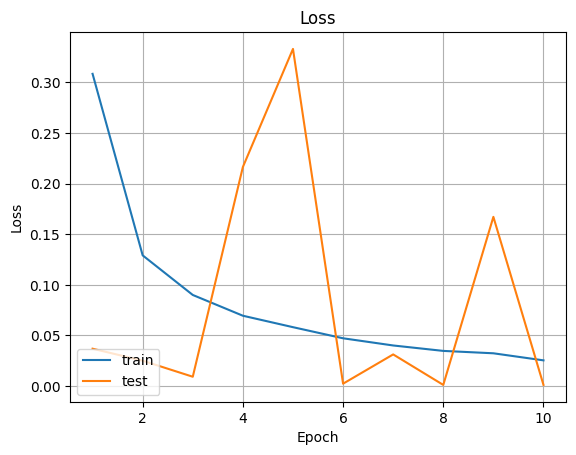

In [122]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(epochs[1:], loss_train_model4[1:])
plt.plot(epochs[1:], loss_test_model4[1:])
plt.legend(['train', 'test'], loc=3)
plt.show()

## Model5 fitting

In [123]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model5.parameters(), lr=1e-3)

In [124]:
device = 'cpu'
model = model5.to(device)
loss = loss.to(device)

In [125]:
loss_train_model5 = [0]
loss_test_model5 = [0]
acc_train_model5 = [0]
acc_test_model5 = [0]

In [126]:
epochs = 10

for epoch in range(epochs):
  print('Epoch ' + str(epoch+1))
  print()
  loss_train = 0
  acc_train = 0
  loss_test = 0
  acc_test = 0
  for img, label in dataloader_train:
    opt.zero_grad()
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_am = loss(fcast, label)
    loss_am.backward()
    loss_train += loss_am.item()

    opt.step()
    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_train += acc_current

    #pbar.set_description(f'loss: {loss_am.item():.5f}\taccuracy: {acc_current:.3f}')
  print('loss_train:' + str(loss_train/len(dataloader_train)))
  print('acc_train:' + str(acc_train/len(dataloader_train)))
  acc_train_model5.append(acc_train/len(dataloader_train))
  loss_train_model5.append(loss_train/len(dataloader_train))

  for img, label in dataloader_test:
    img = img.to(device)
    label = label.to(device)

    label = nn.functional.one_hot(label, 10).float()
    fcast = model(img)

    loss_test += loss_am.item()

    acc_current = accuracy(fcast.cpu(), label.cpu())
    acc_test += acc_current

  print('loss_test:' + str(loss_test/len(dataloader_test)))
  print('acc_test:' + str(acc_test/len(dataloader_test)))
  acc_test_model5.append(acc_test/len(dataloader_test))
  loss_test_model5.append(loss_test/len(dataloader_test))
  print('------------------------------------------------------------')

Epoch 1



<ipython-input-94-02407182cc67>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = nn.functional.softmax(


loss_train:0.325735033762098
acc_train:0.9001458333333333
loss_test:0.4769948720932007
acc_test:0.9461666666666667
------------------------------------------------------------
Epoch 2

loss_train:0.12678227089566643
acc_train:0.962625
loss_test:0.18485037982463837
acc_test:0.9644166666666667
------------------------------------------------------------
Epoch 3

loss_train:0.08989451603755394
acc_train:0.9732291666666667
loss_test:0.00201194710098207
acc_test:0.972
------------------------------------------------------------
Epoch 4

loss_train:0.07093683991549672
acc_train:0.9786041666666667
loss_test:0.0007874262519180775
acc_test:0.97175
------------------------------------------------------------
Epoch 5

loss_train:0.05736131046997859
acc_train:0.9822916666666667
loss_test:0.03191789612174034
acc_test:0.9715833333333334
------------------------------------------------------------
Epoch 6

loss_train:0.04756758140976975
acc_train:0.9855416666666666
loss_test:0.21990907192230225
acc_t

## Model5 plots

In [127]:
loss_train_model5 = np.array(loss_train_model5)
loss_test_model5 = np.array(loss_test_model5)
acc_train_model5 = np.array(acc_train_model5)
acc_test_model5 = np.array(acc_test_model5)
epochs = np.arange(len(loss_train_model5))

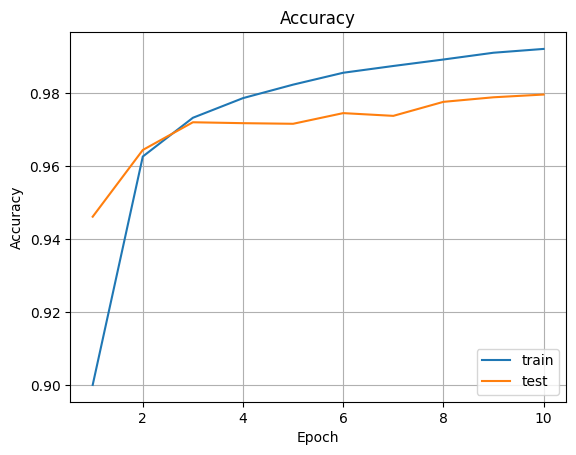

In [128]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(epochs[1:], acc_train_model5[1:])
plt.plot(epochs[1:], acc_test_model5[1:])
plt.legend(['train', 'test'], loc=4)
plt.show()

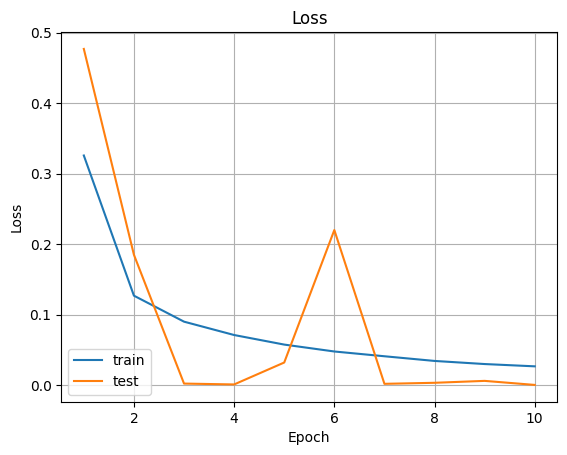

In [129]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(epochs[1:], loss_train_model5[1:])
plt.plot(epochs[1:], loss_test_model5[1:])
plt.legend(['train', 'test'], loc=3)
plt.show()

## Results

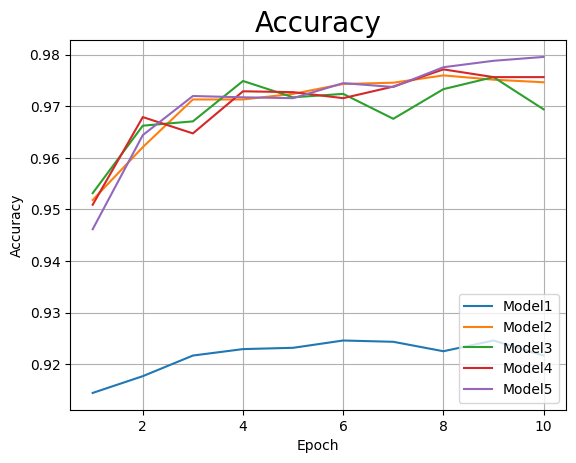

In [130]:
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(np.arange(len(acc_test_model1))[1:], acc_test_model1[1:])
plt.plot(np.arange(len(acc_test_model2))[1:], acc_test_model2[1:])
plt.plot(np.arange(len(acc_test_model3))[1:], acc_test_model3[1:])
plt.plot(np.arange(len(acc_test_model4))[1:], acc_test_model4[1:])
plt.plot(np.arange(len(acc_test_model5))[1:], acc_test_model5[1:])
plt.legend(['Model1', 'Model2', 'Model3', 'Model4', 'Model5'], loc=4)
plt.show()

Conclusion:
It is enough to use a model with two linear layers. But even when using only one, a fairly good determination accuracy is obtained. When using more than two, the results improve, but not significantly. In this case, 3 epochs are enough to train the model2 to obtain an accuracy of more than 97%.